**<font color = "darkred" size="5">ch11.N차원 배열-II</font>**

# 4. 복사와 뷰

## (1) 모두 복사 안함(스칼라 변수 제외)

In [2]:
import numpy as np

In [2]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

In [4]:
b = a # a와 b는 같은 넘파이배열 객체이지만 이름만 다름(복사 안 됨)

In [5]:
b is a

True

In [7]:
b.shape, b.ndim

((12,), 1)

In [8]:
b.shape = 3, 4
b.shape, b.ndim

((3, 4), 2)

In [9]:
a # b의  shape을 바꾸면 a도 바뀐다. 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
id(a), id(b) # 주소 동일

(2218806944112, 2218806944112)

In [11]:
def f(data):
    print(id(data))

In [12]:
f(a)

2218806944112


## (2) 얕은 복사: 뷰(view)

In [13]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
c = a.view()
c is a 

False

In [15]:
c.flags.owndata # c가 직접 메모리를 소유하지는 않는다.

False

In [17]:
a.flags.owndata

True

In [18]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
c.shape, c.ndim

((3, 4), 2)

In [20]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [21]:
a # c의 shape을 바꾸어도 a는 바뀌지 않는다.

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [24]:
c[:,2] = 999
c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [25]:
a # c에 할당한 대로 값이 바뀜 

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [26]:
a = np.arange(12).reshape(3,4)
s = a[:, 1:3] # 슬라이싱될 때 뷰 반환

print(a)
print(s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


In [29]:
s[:,0] = 99
s

array([[99,  2],
       [99,  6],
       [99, 10]])

In [30]:
a

array([[ 0, 99,  2,  3],
       [ 4, 99,  6,  7],
       [ 8, 99, 10, 11]])

## (3) 깊은 복사(copy)

In [31]:
a = np.arange(12).reshape(3,4)
d = a.copy()
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
d is a 

False

In [34]:
d.flags.owndata # d 객체가 메모리를 직접 소유

True

In [36]:
d.base is a # d와 a는 어느 것도 공유하지 않는다.

False

In [37]:
d.shape = (2,6)
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
d[0] = 99 # d의 0행의 값들을 99로 
d

array([[99, 99, 99, 99, 99, 99],
       [ 6,  7,  8,  9, 10, 11]])

In [40]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# 5. 고급 인덱싱 

## (1) 인덱스 배열로 인덱싱 

In [41]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [42]:
i = np.array([1, 1, 3, 8, 5])

In [43]:
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [44]:
l = [1, 1, 3, 8, 5]
a[l]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [46]:
j = np.array ([[3, 4],
               [9, 7]])
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

**인덱스의 단일배열은 첫번째 차원 참조(pt49)**

In [3]:
palette = np.array([[0, 0, 0], # black
                    [255, 0, 0], # red
                    [0, 255, 0], # green
                    [0, 0, 255], # blue
                    [255, 255, 255]]) # white
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

In [4]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_index

array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
       [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
       [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
       [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
       [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
       [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
       [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
       [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
       [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
       [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])

In [5]:
image_data = palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [6]:
image_data.shape

(10, 10, 3)

In [ ]:
# %matplotlib inline 주피터노트북을 실행한 브라우저에서 그림을 바로 볼 수 있게

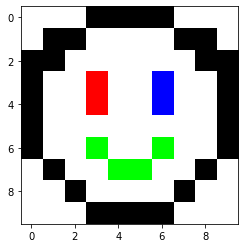

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(image_data, interpolation='nearest')
plt.show()

In [ ]:
# pip install tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
import tensorflow.keras.datasets.mnist.as mnist
mnist = mnist.load_data()
mnist[0][0].shape

In [ ]:
mnist_data = mnist[0][0]
import metaplotlib.pyplot.as plt
pit.imshow(mnist_data[2])

In [ ]:
mnist_data[2]

## (2) 다차원 인덱싱 

In [14]:
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
i = np.array([[0,1],
              [1,2]])
j = np.array([[2,1],
              [3,3]])
print(i)
print(j)

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]


In [18]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
a[i, j] # 0행2열, 1행1열
        # 1행3열  2행3열

array([[ 2,  5],
       [ 7, 11]])

In [20]:
a[i] # 행만 기입하면 열은 모든 열을 의미한다.

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]]])

In [22]:
a[i].shape

(2, 2, 4)

In [23]:
a[i,]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [24]:
a[i, ...]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [25]:
a[i,] == a[i]

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [26]:
np.all(a[i,]==a[i]) # 모든 요소가 true일 때만 true

True

In [27]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
i

array([[0, 1],
       [1, 2]])

In [ ]:
a[i, np.array([[2,2],[2,2]])] # 0행2열, 1행2열
                              # 1행2열, 2행2열 

In [29]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [30]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

## (3) argmax; 최대값이 있는 곳의 인덱스

In [31]:
data = np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [32]:
data.shape

(5, 4)

In [34]:
ind = data.argmax(axis=0) # 각 열에서 가장 큰 값이 있는 index
ind

array([2, 0, 3, 1], dtype=int64)

In [35]:
data_col_max = data[ind, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [36]:
for i, item in enumerate(data_col_max):
    print("{}번째 열의 최대값: {:.5f}".format(i, item))

0번째 열의 최대값: 0.98936
1번째 열의 최대값: 0.84147
2번째 열의 최대값: 0.99061
3번째 열의 최대값: 0.65699


In [37]:
data.max(axis=0)

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [38]:
np.all(data.max(axis=0) == data_col_max)

True

In [ ]:
# 행마다 최대값 출력하기(argmax함수 이용)

In [39]:
ind = data.argmax(axis=1)
ind

array([2, 3, 0, 2, 3], dtype=int64)

In [41]:
data_row_max = data[range(data.shape[0]), ind]
data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [42]:
for i, item in enumerate(data_row_max):
    print("{}번째 행의 최대값: {:.5f}".format(i, item))

0번째 행의 최대값: 0.90930
1번째 행의 최대값: 0.65699
2번째 행의 최대값: 0.98936
3번째 행의 최대값: 0.99061
4번째 행의 최대값: 0.14988


## (4) 인덱싱을 이용한 값 변경

In [43]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [44]:
a[[1,3,4]] = 0
a

array([0, 0, 2, 0, 0])

In [45]:
a = np.arange(5)
a[[0,0,2]] = [9,99,999] #같은 인덱스 번호가 있는 경우 뒤의 값으로 적용됨
a

array([ 99,   1, 999,   3,   4])

In [46]:
a = np.arange(5)
print('변경 전: ', a)
a[[0,0,2]] += 1 # 같은 인덱스 번호가 중복으로 있어도 한번만 증가한다.
print('변경 후: ', a)

변경 전:  [0 1 2 3 4]
변경 후:  [1 1 3 3 4]


## (4) 논리 배열을 이용한 인덱싱 

In [47]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [48]:
b = a%2 == 0
b

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [49]:
a[b]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [50]:
a[b] = a[b]**2
a

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

## (5) ix_() 함수
- N개의 1차원 시퀀스 배열을 입력받아 N차원 N개를 반환

In [51]:
a = np.array([1,2,3,4])
b = np.array([11,12,13])

np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4]]),
 array([[11, 12, 13]]))

In [52]:
a[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

In [53]:
ax, bx = np.ix_(a,b)

In [55]:
print(ax)
print(bx)

[[1]
 [2]
 [3]
 [4]]
[[11 12 13]]


In [57]:
ax.shape, ax.ndim

((4, 1), 2)

In [58]:
bx.shape, bx.ndim

((1, 3), 2)

In [59]:
r = np.add(ax, bx)
r

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17]])

In [60]:
print(a[1]+b[2])
print(r[1,2])

15
15


# 6. 선형대수 
- 2차원 넘파이 배열을 행렬로
    - 행렬곱 : @ 또는 np.dot()
    - 역행렬 : np.linalg.inv(x)
    - 전치행렬 : x.T, x.tanspose()
    - n x n 단위행렬 : np.eye(n)
    - 대각합 : np.trace(x)
    - 연립방정식 해 풀기 : np.linalg.solve(a, b)

## (1)선형 연립방정식 풀이(회귀도출); 독립변수2, 데이터2

In [63]:
a = np.array([[1, 2],
             [3, 4]])

In [64]:
# a의 역행렬 @ a 가 단위행렬인지 확인하기
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [65]:
a @ np.linalg.inv(a)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [66]:
np.all(np.eye(2) @ a == a)

True

In [67]:
np.all(a @ np.eye(2) == a)

True

In [69]:
a = np.array([[1, 2],
              [3, 4]]) # 독립변수
a

array([[1, 2],
       [3, 4]])

In [68]:
y = np.array([[5],
              [7]]) # 종속변수 
y

array([[5],
       [7]])

a @ X = y <br>
a의 역행렬 @ a @ X = a의 역행렬 @ y <br>
X = a의 역행렬 @ y

In [70]:
X = np.linalg.inv(a) @ y
X

array([[-3.],
       [ 4.]])

In [71]:
# 독립변수가 2, 3일 경우 종속변수의 값은? 
2 * X[0] + 3 * X[1]

array([6.])

## (2) 선형 연립방정식(회귀도출)과 그래프; 독립변수 1개

#### 정방행렬을 위해 데이터 2개

In [72]:
x = [2, 3]
y = [6.8, 7.3]

In [73]:
# 2 1
# 3 1 
A = np.column_stack((x, np.ones(len(x)))) # 독립변수 
A

array([[2., 1.],
       [3., 1.]])

In [74]:
Y = np.array(y).reshape(2,1)
Y

array([[6.8],
       [7.3]])

A@X = Y <br>
X = A의 역행렬 @ Y

In [75]:
X = np.linalg.inv(A) @ Y
X

array([[0.5],
       [5.8]])

In [76]:
# 연립방정식 해법을 구하는 함수
np.linalg.solve(A,Y)

array([[0.5],
       [5.8]])

In [78]:
f = A[:,0]*X[0] + X[1] # 도출된 회귀식
f

array([6.8, 7.3])

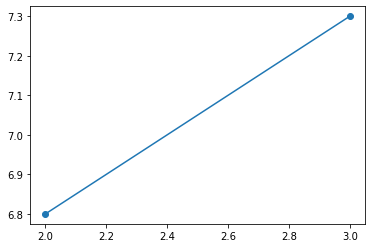

In [80]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

# plt.plot(x, y, '-')
plt.plot(A[:,0], f, '-')
plt.show()

#### 데이터 n개

In [81]:
x = [32, 64, 96, 118, 216, 114, 152, 158] # 독립변수
y = [18, 24, 61.5, 49, 52, 105, 130, 125] # 종속변수

In [82]:
A = np.column_stack((x, np.ones(len(x))))
print(A)

B = np.array(y).reshape(len(y),1)
print(B)

[[ 32.   1.]
 [ 64.   1.]
 [ 96.   1.]
 [118.   1.]
 [216.   1.]
 [114.   1.]
 [152.   1.]
 [158.   1.]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130. ]
 [125. ]]


A@X = B  <br>
(A.T @ A) @ X = A.T @ B <br> 
(A.T @ A)의 역행렬 @ (A.T @ A) @ X = (A.T @ A)의 역행렬 @ A.T @ B <br> 
X = (A.T @ A)의 역행렬 @ A.T @ B

In [83]:
X = np.linalg.inv(A.T @ A) @ A.T @ B
X

array([[ 0.40900507],
       [21.99314773]])

In [ ]:
# np.linalg.solve(A, B) 불가

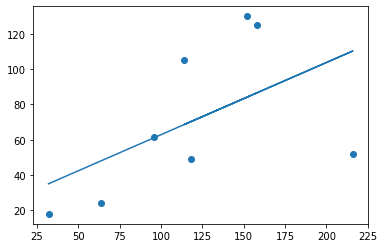

In [84]:
%matplotlib inline
plt.scatter(x, y)
plt.plot(A[:,0], A[:,0]*X[0]+X[1],'-')
plt.show()

# 7. 유용한 팁

In [85]:
# 정규분포데이터 넘파이 배열 만들기(평균은 mu, 표준편차는 sigma)
mu, sigma = 2, 0.5
v = np.random.normal(mu, sigma, 100000)

In [86]:
(n, bins) = np.histogram(v, bins=50, density=True)
len(n), len(bins)

(50, 51)

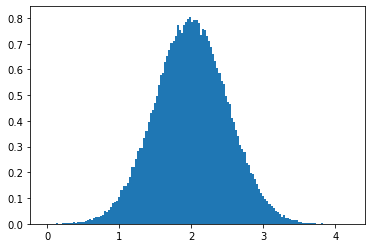

In [87]:
plt.hist(v, bins='auto', density=1)
plt.show()

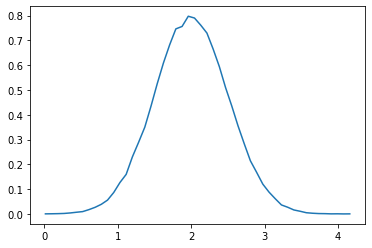

In [88]:
plt.plot((bins[:-1]+bins[1:])/2, n)
plt.show()

# <연습문제>

## (1)  실습형

In [90]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data # 독립변수
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [91]:
iris.feature_names # 독립변수의 column 내용

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [92]:
#1. 각 변수별 평균
np.mean(iris_data, axis=0) # 열별 평균

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [93]:
#2. 처음 다섯개 행 출력 
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [94]:
#3. 처음 다섯 행에서 마지막 열을 제외한 나머지 열 출력
ex3 = iris_data[:5, :-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [95]:
#4. 처음 다섯 행에서 마지막 열만 출력 
ex4 = iris_data[:5,-1]
ex4

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
#5  3번, 4번 배열을 원래의 모양으로 합치기

In [96]:
np.c_[ex3, ex4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [97]:
np.column_stack((ex3, ex4))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [98]:
np.hstack((ex3, ex4[:, np.newaxis]))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [99]:
#6 처음 다섯 행을 이용하여 열별로 평균보다 큰 값들만 출력 
iris_sample = iris_data[:5]
iris_sample[iris_sample > np.mean(iris_sample, axis=0)]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [100]:
iris_sample

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [101]:
np.mean(iris_sample, axis = 0) # 각 열별 평균

array([4.86, 3.28, 1.4 , 0.2 ])

## (2) 문제풀이형

In [102]:
#1. (3)
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [103]:
print(a.sum())

66


In [105]:
print(a.sum(0)) # 열 끼리의 합

[12 15 18 21]


In [106]:
#2 
a = np.floor(10*np.random.random((3,4)))
a

array([[5., 6., 7., 2.],
       [3., 0., 1., 9.],
       [3., 7., 6., 8.]])

In [107]:
a.ravel()

array([5., 6., 7., 2., 3., 0., 1., 9., 3., 7., 6., 8.])

In [108]:
a.reshape(6,2)

array([[5., 6.],
       [7., 2.],
       [3., 0.],
       [1., 9.],
       [3., 7.],
       [6., 8.]])

In [111]:
a.resize(2,6)
a

array([[5., 6., 7., 2., 3., 0.],
       [1., 9., 3., 7., 6., 8.]])

In [112]:
a.T

array([[5., 1.],
       [6., 9.],
       [7., 3.],
       [2., 7.],
       [3., 6.],
       [0., 8.]])

In [113]:
# 3 (1)
a = np.arange(12).reshape(3,4)
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [114]:
#4 (2)
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a

array([1, 0, 3, 0, 0])

In [115]:
#5 (2)
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])

np.c_[a,b]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [116]:
np.dstack((a,b))

array([[[ 1,  6],
        [ 2,  7],
        [ 3,  8],
        [ 4,  9],
        [ 5, 10]]])

In [117]:
np.column_stack((a,b))

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [118]:
np.hstack((a[:, np.newaxis], b[:, np.newaxis]))

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [119]:
np.stack((a,b), axis=1)

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])